## Importing Libraries and Data

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.linear_model import Ridge 
rig=Ridge()
from sklearn.linear_model import Lasso
la=Lasso()
from sklearn.linear_model import ElasticNet
en=ElasticNet()
from matplotlib import pyplot as plt
import seaborn as sbn 
%matplotlib inline

In [2]:
df=pd.read_csv('Data/datafile_final.csv')

In [3]:
df.head()

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,Noal,IR1,Lvl,AllPub,...,210,62,0,0,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,Noal,Reg,Lvl,AllPub,...,140,0,0,0,120,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,Noal,IR1,Lvl,AllPub,...,393,36,0,0,0,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,Noal,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,Noal,IR1,Lvl,AllPub,...,212,34,0,0,0,3,2010,WD,Normal,189900


In [4]:
df.drop('Order', axis=1, inplace=True)

In [5]:
df.describe()

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,...,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,SalePrice
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,57.383066,69.499829,10148.293274,5.562991,1971.372823,1984.261523,101.131444,442.442472,49.722431,559.156367,...,1.766815,472.819734,93.724479,47.549676,22.947081,2.593377,16.007511,6.217139,2007.790714,180806.263913
std,42.644668,22.859768,7881.337623,1.111697,30.237318,20.862070,178.655274,455.660069,169.168476,439.591709,...,0.760566,215.046549,126.374434,67.489204,64.054832,25.145578,56.096167,2.714305,1.316757,79898.423323
min,20.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.750000,7440.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,...,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,69.000000,9439.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,...,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11556.000000,6.000000,2001.000000,2004.000000,163.000000,734.000000,0.000000,802.000000,...,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,12.000000,2010.000000,755000.000000


# Preprocessing 
### Looking at the distribution of SalePrice
Fixing the skewness of SalePrice also confirming that SalePrice is skewed.  

<AxesSubplot:>

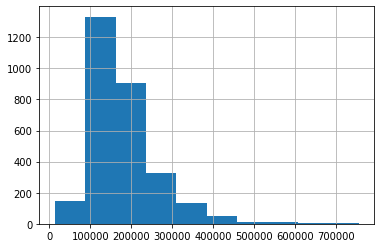

In [6]:
df.SalePrice.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98cb712fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98cb723550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f98cb712bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98cb723c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98981d3040>],
 'means': []}

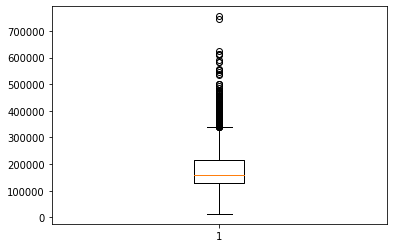

In [7]:
plt.boxplot(df['SalePrice'])

In [8]:
df['SalePrice'].describe()

count      2929.000000
mean     180806.263913
std       79898.423323
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df['SalePrice'].value_counts()

135000    34
140000    33
130000    29
155000    28
145000    26
          ..
292500     1
446261     1
136870     1
313000     1
98300      1
Name: SalePrice, Length: 1031, dtype: int64

In [10]:
# confirming that the distribution is skewe
resp=df.SalePrice
from scipy.stats import shapiro
shapiro(resp)[1]

2.4102333586386854e-43

Since our shapiro numbber is extremely less than .05 we can determine that the distribution is not normal.  

Taking the square root looks like the best way to correct the skewness

/Users/andreafung/opt/anaconda3/envs/springboard/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

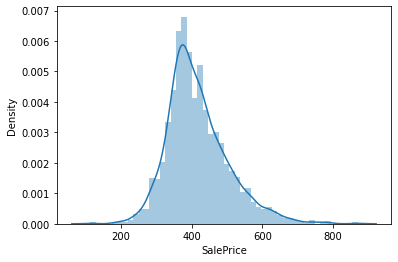

In [11]:
recip=resp**(.5)
sbn.distplot(recip)

In [12]:
recip

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

In [13]:
df['SalePrice']=recip

In [14]:
df['SalePrice']

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

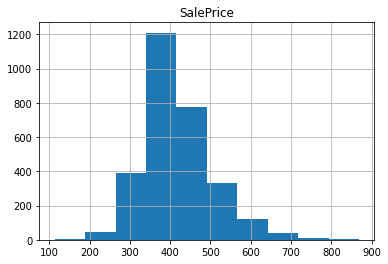

In [15]:
df.hist('SalePrice')

###  Creating Dummie variables
Creating dummie variables with all the categorical variables

Moving SalePrice to the first column

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2929 non-null   int64  
 1   MS.Zoning        2929 non-null   object 
 2   Lot.Frontage     2929 non-null   float64
 3   Lot.Area         2929 non-null   int64  
 4   Street           2929 non-null   object 
 5   Alley            2929 non-null   object 
 6   Lot.Shape        2929 non-null   object 
 7   Land.Contour     2929 non-null   object 
 8   Utilities        2929 non-null   object 
 9   Lot.Config       2929 non-null   object 
 10  Land.Slope       2929 non-null   object 
 11  Neighborhood     2929 non-null   object 
 12  Condition.1      2929 non-null   object 
 13  Condition.2      2929 non-null   object 
 14  Bldg.Type        2929 non-null   object 
 15  House.Style      2929 non-null   object 
 16  Overall.Cond     2929 non-null   int64  
 17  Year.Built    

In [17]:
ddf=df.copy()

In [18]:
ddf['SalePrice']

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

In [19]:
sp=ddf['SalePrice']
ddf.drop(labels=['SalePrice'], axis=1, inplace = True)
ddf.insert(0,'SalePrice',sp)

In [20]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalePrice        2929 non-null   float64
 1   MS.SubClass      2929 non-null   int64  
 2   MS.Zoning        2929 non-null   object 
 3   Lot.Frontage     2929 non-null   float64
 4   Lot.Area         2929 non-null   int64  
 5   Street           2929 non-null   object 
 6   Alley            2929 non-null   object 
 7   Lot.Shape        2929 non-null   object 
 8   Land.Contour     2929 non-null   object 
 9   Utilities        2929 non-null   object 
 10  Lot.Config       2929 non-null   object 
 11  Land.Slope       2929 non-null   object 
 12  Neighborhood     2929 non-null   object 
 13  Condition.1      2929 non-null   object 
 14  Condition.2      2929 non-null   object 
 15  Bldg.Type        2929 non-null   object 
 16  House.Style      2929 non-null   object 
 17  Overall.Cond  

In [21]:
#changing all objects into categories
ddf[ddf.select_dtypes(['object']).columns] = ddf.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [22]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SalePrice        2929 non-null   float64 
 1   MS.SubClass      2929 non-null   int64   
 2   MS.Zoning        2929 non-null   category
 3   Lot.Frontage     2929 non-null   float64 
 4   Lot.Area         2929 non-null   int64   
 5   Street           2929 non-null   category
 6   Alley            2929 non-null   category
 7   Lot.Shape        2929 non-null   category
 8   Land.Contour     2929 non-null   category
 9   Utilities        2929 non-null   category
 10  Lot.Config       2929 non-null   category
 11  Land.Slope       2929 non-null   category
 12  Neighborhood     2929 non-null   category
 13  Condition.1      2929 non-null   category
 14  Condition.2      2929 non-null   category
 15  Bldg.Type        2929 non-null   category
 16  House.Style      2929 non-null   category


Creating Dummy variables

In [23]:
df_dummie=pd.get_dummies(ddf,drop_first=True)

### Separating x and y variables

In [24]:
# explanatory variable
X=df_dummie.drop(['SalePrice'], axis=1)
# response variable 
y=df_dummie.SalePrice

### Creating Scaler objects

In [25]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [26]:
#creating the scaled X variable
scaled_x=scaler.fit_transform(X)

In [27]:
scaled_x.shape

(2929, 260)

In [28]:
y.shape

(2929,)

In [29]:
names=X.columns
scaled_X=pd.DataFrame(scaled_x,columns=names)

In [30]:
scaled_X.shape

(2929, 260)

# Splitting into training and test datasets

In [31]:
from sklearn.model_selection import train_test_split

#create 1-dimensional flattened array to our response variable
y=y.ravel()

#cal the train_test_split() function with the first two parameters
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=1)

# Modeling 

In [32]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [33]:
#creating the model
lr_model=linear_model.LinearRegression(normalize=True)

In [34]:
#train out model on our test data
model_results= lr_model.fit(X_train, y_train)

In [35]:
#evaluate model 
print(lr_model.score(X_train, y_train))

0.9296444916348601


In [36]:
#make predictions with our test data
y_pred=lr_model.predict(X_test)

In [37]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("R squared: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  111485629094.4565
Mean Square Error:  8.363978084122215e+24
Root Mean Squared Error:  2892054301724.3325
R squared:  -1.1409362587335004e+21


###  Our RMSE and Mean Absolute Evaluation and R squared
The error is extremely large which means that although our scores are high the predictions' error are not within a range that is acceptable.  We would like the mean square error to be smaller.  We would like the r squared to be a positive number not a negative number which means that there is a bad fit.   

##### Possible next steps
1. Evaluate which variables to keep and which variables to delete that have the least affect on the model. 
2. Combine variables that have high correlations with each other/ 
3. Feature engineer new variables. 

Then re-run model for better results.  

### Evaluating our model with OLSmodel
Using olsmodel to see which variables to exclude and further look at our model.  

In [38]:
olsmodel=sm.OLS(y_train,X_train)
olsmodel_results=olsmodel.fit()

In [39]:
olsmodel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:05:00   Log-Likelihood:                -10010.
No. Observations:                2196   AIC:                         2.052e+04
Df Residuals:                    1944   BIC:                         2.196e+04
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
MS.SubClass               -4.1101      2.784     -1.476      0.140      -9.570       1.350
Lot.Frontage               0.7459      0.869      0.858      0.391      -0.959       2.451
Lot.Area                   3.7624      0.849      4.433      0.000       2.098       5.427
Overall.Cond               9.3589      0.839     11.159      0.000       7.714      11.004
Year.Built                12.1593      1.988      6.118      0.000       8.261      16.057
Year.Remod.Add             2.6243      1.001      2.623      0.009       0.662       4.587
Mas.Vnr.Area               0.1977      0.888      0.223      0.824      -1.543       1.939
BsmtFin.SF.1               4.7178      0.837      5.635      0.000       3.076       6.360
BsmtFin.SF.2               2.1476      1.032      2.081      0.038       0.123       4.172
Bsmt.Unf.SF               -0.7390      0.722     -1.023      0.306      -2.155       0.677
Total.Bsmt.SF              4.9615      1.114      4.453      0.000       2.776       7.147
X1st.Flr.SF                9.3050      1.223      7.606      0.000       6.906      11.704
X2nd.Flr.SF               12.3701      1.339      9.241      0.000       9.745      14.995
Low.Qual.Fin.SF            0.4447      0.612      0.726      0.468      -0.756       1.646
Gr.Liv.Area               17.7353      1.016     17.454      0.000      15.743      19.728
Bsmt.Full.Bath             2.2309      0.859      2.598      0.009       0.547       3.915
Bsmt.Half.Bath            -1.0375      0.612     -1.696      0.090      -2.237       0.162
Full.Bath                  4.0583      1.020      3.980      0.000       2.059       6.058
Half.Bath                  0.8656      0.894      0.968      0.333      -0.888       2.620
Bedroom.AbvGr             -0.1532      0.931     -0.165      0.869      -1.978       1.672
Kitchen.AbvGr             -2.4672      1.045     -2.361      0.018      -4.516      -0.418
TotRms.AbvGrd             -0.7993      1.204     -0.664      0.507      -3.161       1.562
Fireplaces                 4.5505      1.413      3.221      0.001       1.780       7.322
Garage.Yr.Blt              6.7582     21.427      0.315      0.752     -35.264      48.780
Garage.Cars                4.4749      1.490      3.004      0.003       1.554       7.396
Garage.Area                4.2834      1.462      2.930      0.003       1.417       7.150
Wood.Deck.SF               0.8218      0.649      1.267      0.205      -0.451       2.094
Open.Porch.SF             -1.1339      0.630     -1.801      0.072      -2.369       0.101
Enclosed.Porch             1.2799      0.676      1.893      0.058      -0.046       2.606
X3Ssn.Porch               -0.7998      0.640     -1.250      0.212      -2.055       0.455
Screen.Porch               3.1869      0.580      5.494      0.000       2.049  

In [40]:
olsmodel_results.pvalues.argsort

<bound method Series.argsort of MS.SubClass               1.400292e-01
Lot.Frontage              3.910926e-01
Lot.Area                  9.826552e-06
Overall.Cond              4.523746e-28
Year.Built                1.145094e-09
                              ...     
Sale.Condition_AdjLand    1.073040e-03
Sale.Condition_Alloca     2.074555e-02
Sale.Condition_Family     4.788398e-01
Sale.Condition_Normal     6.566989e-06
Sale.Condition_Partial    7.715006e-01
Length: 260, dtype: float64>

In [41]:
olsmodel_results.pvalues.min

<bound method NDFrame._add_numeric_operations.<locals>.min of MS.SubClass               1.400292e-01
Lot.Frontage              3.910926e-01
Lot.Area                  9.826552e-06
Overall.Cond              4.523746e-28
Year.Built                1.145094e-09
                              ...     
Sale.Condition_AdjLand    1.073040e-03
Sale.Condition_Alloca     2.074555e-02
Sale.Condition_Family     4.788398e-01
Sale.Condition_Normal     6.566989e-06
Sale.Condition_Partial    7.715006e-01
Length: 260, dtype: float64>

### Gradient Boosting Regressor 

In [62]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr=GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
y_pred=gbr.predict(X_test)
gbr.score(X_test,y_test)

0.9093474205228738

In [63]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("R squared: ", metrics.r2_score(y_test,y_pred))
print("Explained Variance ", metrics.explained_variance_score(y_test,y_predrfr))

Mean Absolute Error:  17.445089683210895
Mean Square Error:  664.5561329232287
Root Mean Squared Error:  25.778986266399784
R squared:  0.9093474205228738
Explained Variance  0.9001100048052486


##  Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train, y_train)
y_predrfr= rfr.predict(X_test)
rfr.score(X_test, y_test)

0.900612327522477

In [69]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_predrfr))
print("Mean Square Error: ", metrics.mean_squared_error(y_test, y_predrfr))
print("Root Mean Squared Error: ",(np.sqrt(metrics.mean_squared_error(y_test, y_predrfr))))
print("R squared: ", metrics.r2_score(y_test,y_predrfr))
print("Explained Variance ", metrics.explained_variance_score(y_test,y_predrfr))

Mean Absolute Error:  18.363099979386238
Mean Square Error:  728.5913722793591
Root Mean Squared Error:  26.992431759279473
R squared:  0.900612327522477
Explained Variance  0.9007907431887086


## Lasso Regression 


In [67]:
from sklearn.linear_model import Lasso
las=Lasso(alpha=.2)
las.fit(X_train, y_train)
las_pred=las.predict(X_test)
las.score(X_test, y_test)

0.9203055196310759

In [70]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,las_pred))
print("Mean Square Error: ", metrics.mean_squared_error(y_test, las_pred))
print("Root Mean Squared Error: ",(np.sqrt(metrics.mean_squared_error(y_test, las_pred))))
print("R squared: ", metrics.r2_score(y_test,las_pred))
print("Explained Variance ", metrics.explained_variance_score(y_test,las_pred))

Mean Absolute Error:  16.694588149420028
Mean Square Error:  584.2244754068118
Root Mean Squared Error:  24.170735930186567
R squared:  0.9203055196310759
Explained Variance  0.9204168076369394
